Starting processing in directory: /Users/manognatellore/Desktop/MT_Data
Processing label: Happy
Processing label: Excited
Processing label: GoodBye
Processing label: thanks
Processing label: hello
Processing label: GoodMorning
Processing label: TakeCare
Processing label: iloveyou
Analyzing data for label: Happy
Label: Happy
Mean: 0.34471222591360734
Standard Deviation: 0.2896112647311956
Min: -0.9682561159133911
Max: 2.2190914154052734


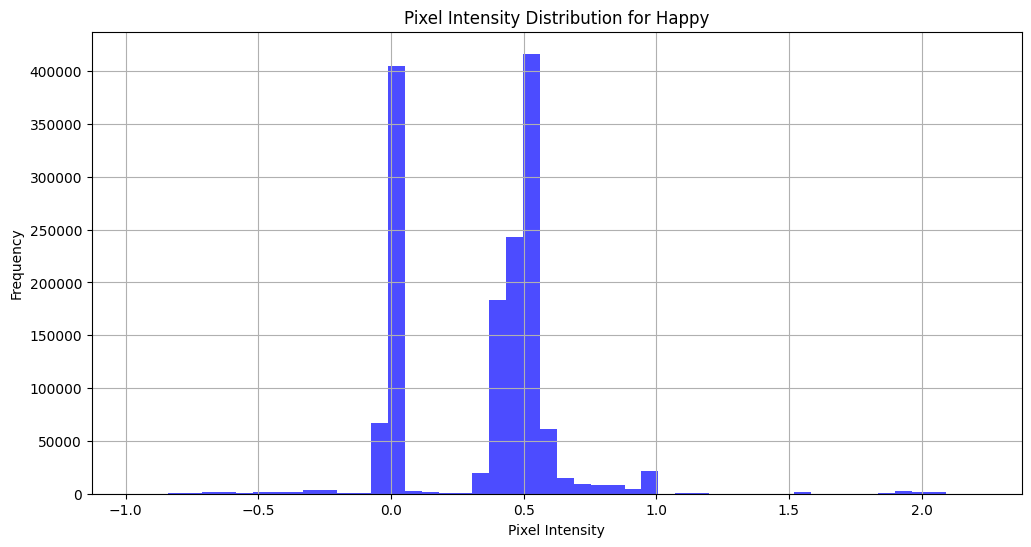

Analyzing data for label: Excited
Label: Excited
Mean: 0.3398851150251119
Standard Deviation: 0.28783881585124976
Min: -1.313859224319458
Max: 2.4945952892303467


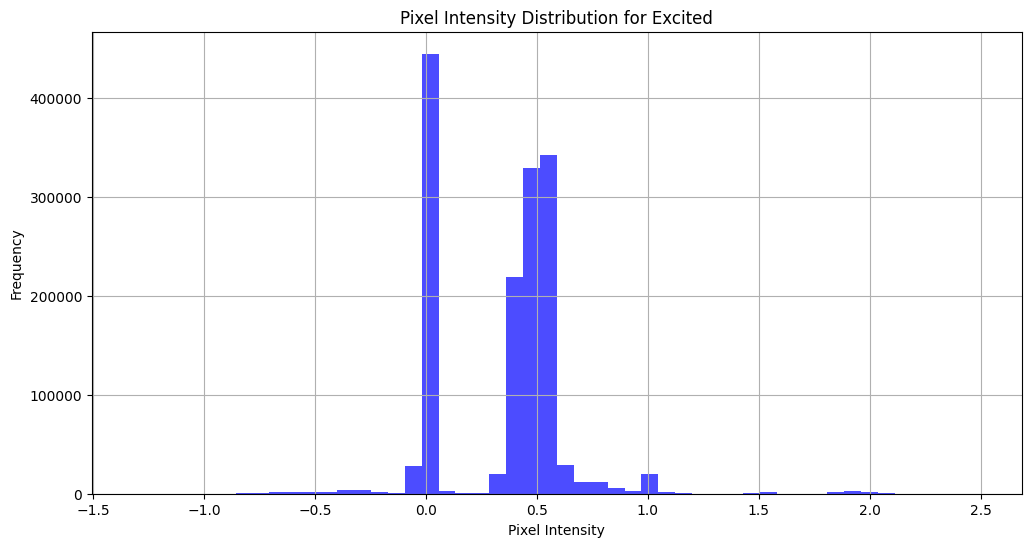

Analyzing data for label: GoodBye
Label: GoodBye
Mean: 0.3286908408191991
Standard Deviation: 0.29192006909896023
Min: -1.0577282905578613
Max: 2.229891777038574


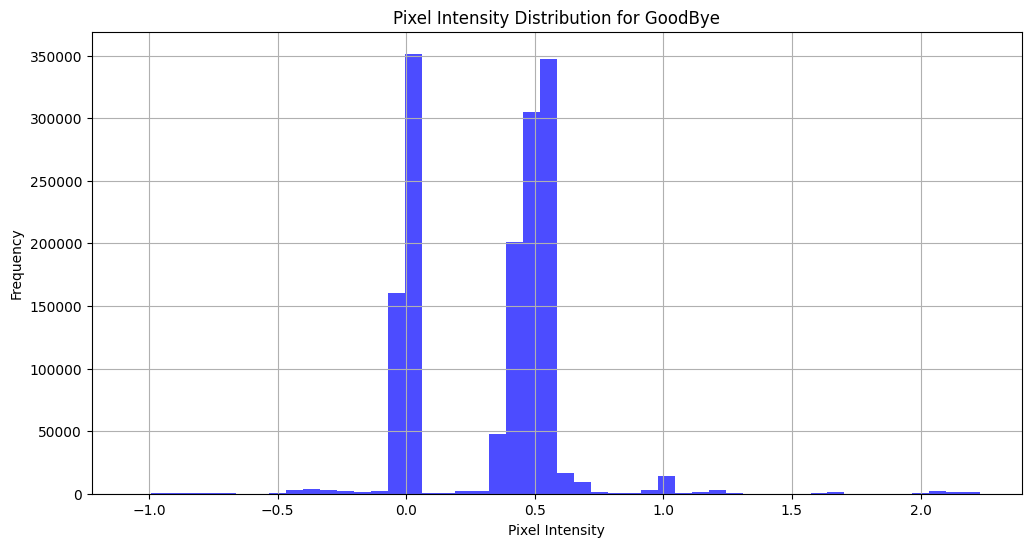

Analyzing data for label: thanks
Label: thanks
Mean: 0.3396476330269325
Standard Deviation: 0.284758060476163
Min: -0.946639358997345
Max: 2.3887979984283447


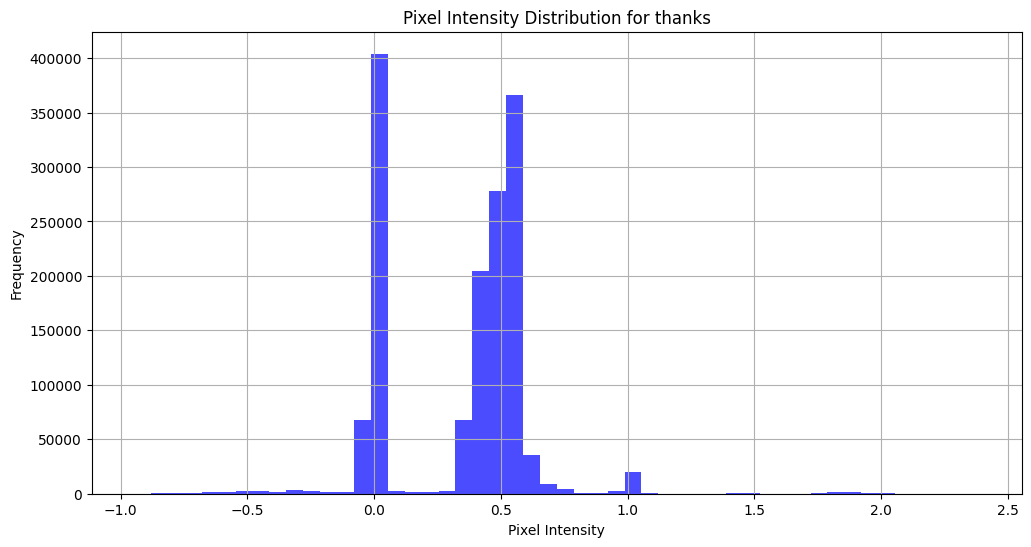

Analyzing data for label: hello
Label: hello
Mean: 0.3769595922256122
Standard Deviation: 0.3263697534489276
Min: -1.3376384973526
Max: 2.711411237716675


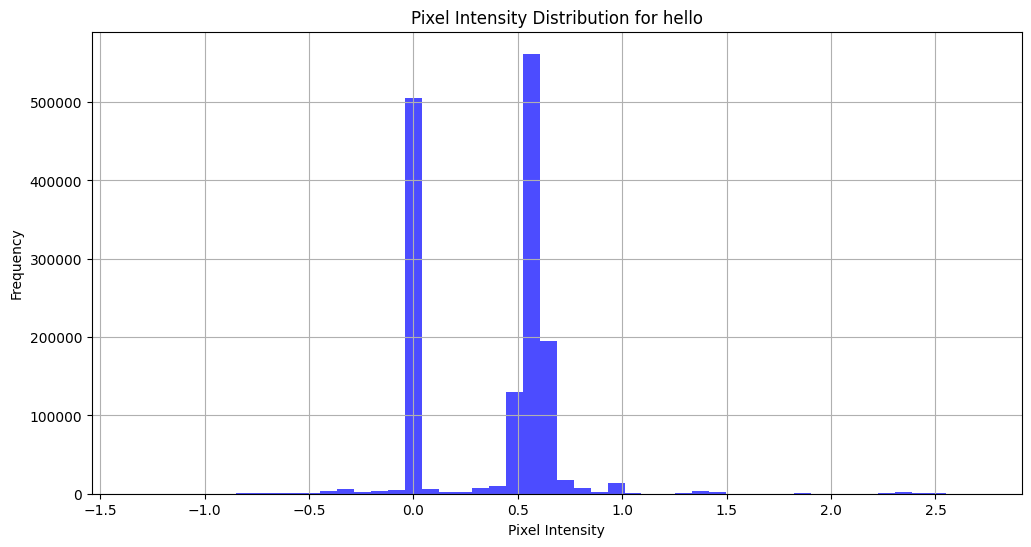

Analyzing data for label: GoodMorning
Label: GoodMorning
Mean: 0.3355669100756488
Standard Deviation: 0.2823362801264292
Min: -1.027097463607788
Max: 2.4649605751037598


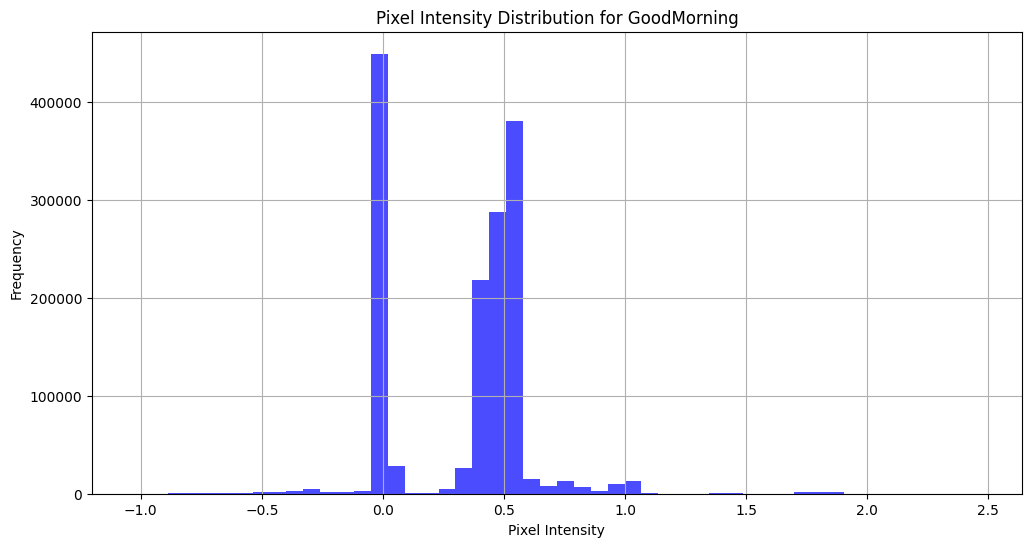

Analyzing data for label: TakeCare
Label: TakeCare
Mean: 0.339813630647806
Standard Deviation: 0.28860316037483785
Min: -0.9551247358322144
Max: 2.1952691078186035


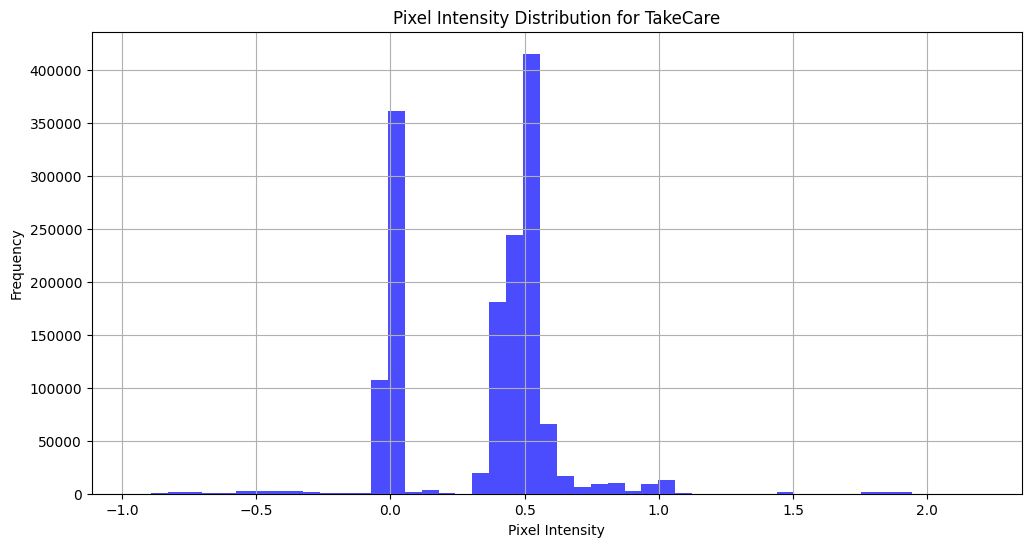

Analyzing data for label: iloveyou
Label: iloveyou
Mean: 0.3262434568843982
Standard Deviation: 0.28999007931902643
Min: -1.0793875455856323
Max: 2.2571561336517334


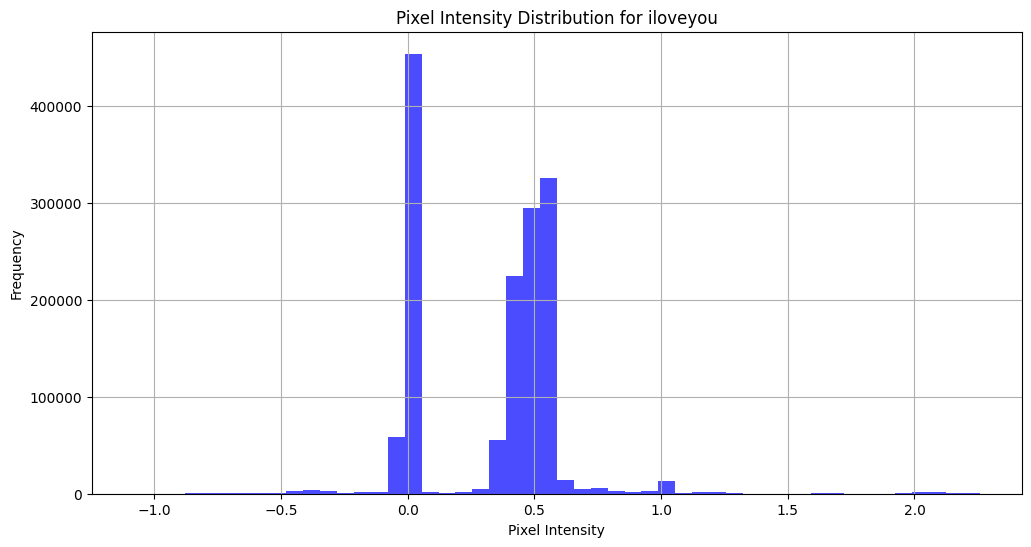

In [2]:

# Function to extract statistics and create a histogram for each label
def analyze_label_data(label, data_list):
    print(f"Analyzing data for label: {label}")
    
    # Concatenate all data from this label into a single array
    concatenated_data = np.concatenate([data.ravel() for data in data_list])
    
    # Calculate statistics
    mean_val = np.mean(concatenated_data)
    std_val = np.std(concatenated_data)
    min_val = np.min(concatenated_data)
    max_val = np.max(concatenated_data)
    
    print(f"Label: {label}")
    print(f"Mean: {mean_val}")
    print(f"Standard Deviation: {std_val}")
    print(f"Min: {min_val}")
    print(f"Max: {max_val}")
    
    # Plot histogram
    plt.figure(figsize=(12, 6))
    plt.hist(concatenated_data, bins=50, color='blue', alpha=0.7)
    plt.title(f'Pixel Intensity Distribution for {label}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.show()

# Function to process the directory and aggregate data by label
def process_directory(directory):
    print(f"Starting processing in directory: {directory}")
    label_data = {}
    
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue  # Skip any non-directory files
        
        print(f"Processing label: {label}")
        label_data[label] = []
        
        for subfolder in os.listdir(label_dir):
            subfolder_path = os.path.join(label_dir, subfolder)
            if not os.path.isdir(subfolder_path):
                continue  # Skip any non-directory files

            for file in os.listdir(subfolder_path):
                if file.endswith('.npy'):
                    file_path = os.path.join(subfolder_path, file)
                    data = np.load(file_path)
                    label_data[label].append(data)
    
    # Analyse data for each label
    for label, data_list in label_data.items():
        if data_list:  # Ensure there is data to process
            analyze_label_data(label, data_list)


directory_path = r'/Users/manognatellore/Desktop/MT_Data'  

# Start processing
if os.path.exists(directory_path):
    process_directory(directory_path)
else:
    print(f"The directory {directory_path} does not exist.")


Processing directory: /Users/manognatellore/Desktop/MT_Data/Happy
Skipping non-directory file: /Users/manognatellore/Desktop/MT_Data/Happy/.DS_Store
Entering sub-directory: /Users/manognatellore/Desktop/MT_Data/Happy/20
Attempting to load .npy file: /Users/manognatellore/Desktop/MT_Data/Happy/20/20.npy
Successfully loaded .npy file: /Users/manognatellore/Desktop/MT_Data/Happy/20/20.npy
Attempting to load .npy file: /Users/manognatellore/Desktop/MT_Data/Happy/20/21.npy
Successfully loaded .npy file: /Users/manognatellore/Desktop/MT_Data/Happy/20/21.npy
Attempting to load .npy file: /Users/manognatellore/Desktop/MT_Data/Happy/20/23.npy
Successfully loaded .npy file: /Users/manognatellore/Desktop/MT_Data/Happy/20/23.npy
Attempting to load .npy file: /Users/manognatellore/Desktop/MT_Data/Happy/20/22.npy
Successfully loaded .npy file: /Users/manognatellore/Desktop/MT_Data/Happy/20/22.npy
Attempting to load .npy file: /Users/manognatellore/Desktop/MT_Data/Happy/20/26.npy
Successfully loaded 

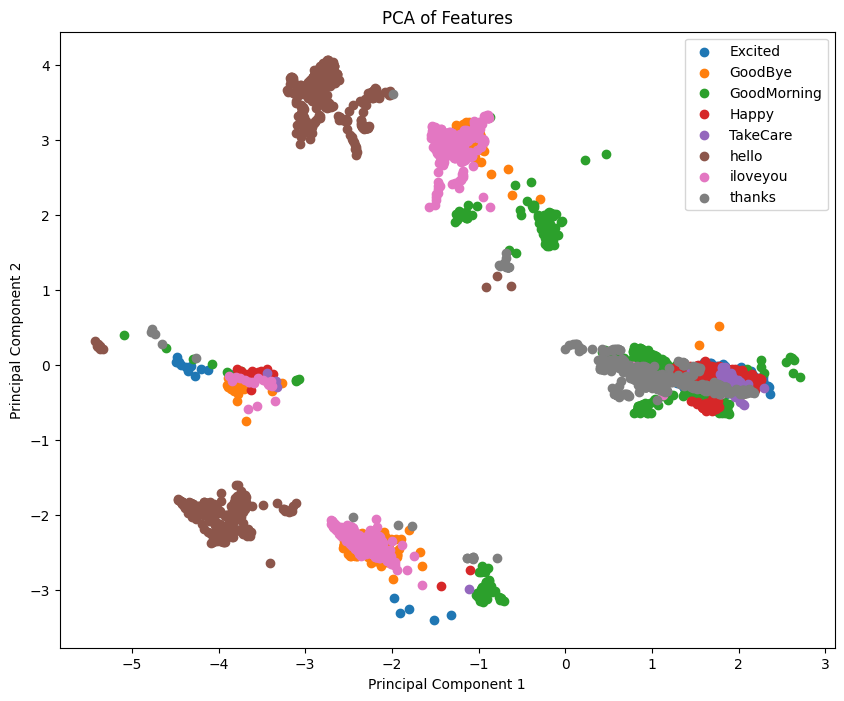

In [5]:
# PCA to visualise high-dimensional data

import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

# Function to load features from a .npy file
def load_npy_features(file_path):
    print(f"Attempting to load .npy file: {file_path}")
    try:
        data = np.load(file_path)
        print(f"Successfully loaded .npy file: {file_path}")
        return data.flatten()  # Flatten the array if it's multi-dimensional
    except Exception as e:
        print(f"Failed to load .npy file: {file_path}. Error: {e}")
        return None


image_directory = r'/Users/manognatellore/Desktop/MT_Data'
# Collect all features and corresponding labels (actions)
features = []
labels = []

# Loop through the directories and load .npy files
for action in os.listdir(image_directory):
    action_dir = os.path.join(image_directory, action)
    if not os.path.isdir(action_dir):  # Skip if not a directory
        print(f"Skipping non-directory: {action_dir}")
        continue
    print(f"Processing directory: {action_dir}")
    
    # Now, let's go deeper into each directory
    for subdir in os.listdir(action_dir):
        subdir_path = os.path.join(action_dir, subdir)
        if os.path.isdir(subdir_path): 
            print(f"Entering sub-directory: {subdir_path}")
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if file_path.endswith('.npy'):  # Only process .npy files
                    feature_vector = load_npy_features(file_path)
                    if feature_vector is not None:
                        features.append(feature_vector)
                        labels.append(action)
                else:
                    print(f"Skipping non-.npy file: {file_path}")
        else:
            print(f"Skipping non-directory file: {subdir_path}")

# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Check if features were extracted
if features.size == 0:
    print("No features extracted. Please check the .npy files and the loading process.")
else:
    print(f"Extracted {len(features)} feature vectors.")
    # Apply PCA to reduce dimensions
    pca = PCA(n_components=2)  
    pca_result = pca.fit_transform(features)

    # Visualise the PCA result
    plt.figure(figsize=(10, 8))
    for action in np.unique(labels):
        indices = np.where(labels == action)
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=action)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Features')
    plt.legend()
    plt.show()


Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/20.npy
Loaded 831 keypoints.
Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/21.npy
Loaded 831 keypoints.
Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/23.npy
Loaded 831 keypoints.
Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/22.npy
Loaded 831 keypoints.
Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/26.npy
Loaded 831 keypoints.
Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/27.npy
Loaded 831 keypoints.
Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/25.npy
Loaded 831 keypoints.
Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/19.npy
Loaded 831 keypoints.
Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/18.npy
Loaded 831 keypoints.
Loading keypoints from: /Users/manognatellore/Desktop/MT_Data/Happy/20/24.npy
Loaded 831 keypoints.


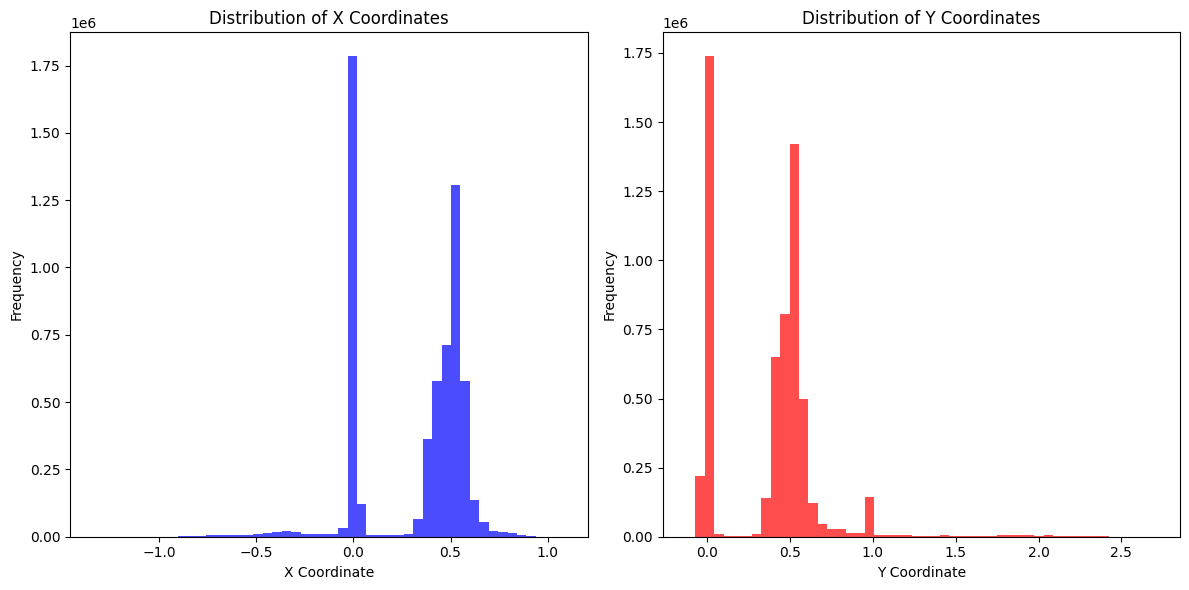

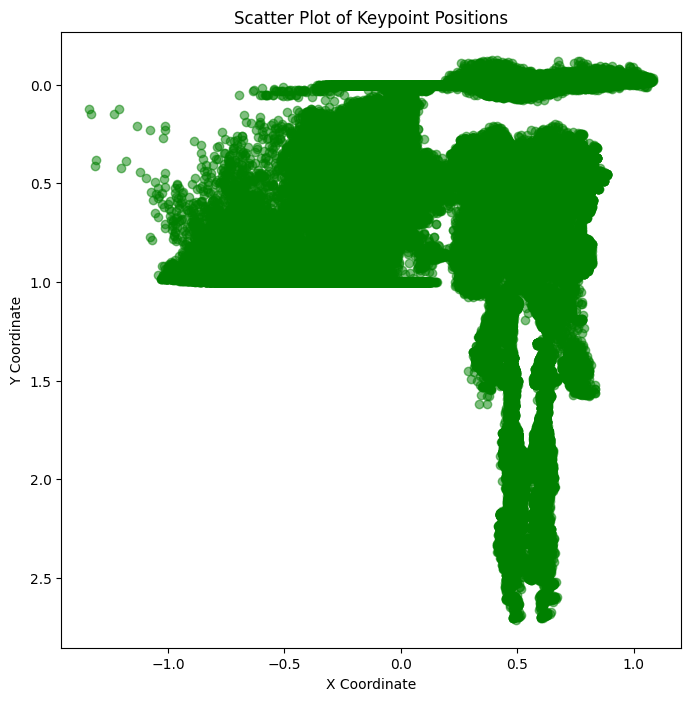

In [6]:
# keypoints distribution in the dataset

import os
import numpy as np
from matplotlib import pyplot as plt

# Function to load keypoints from a .npy file
def load_keypoints(file_path):
    print(f"Loading keypoints from: {file_path}")
    try:
        keypoints = np.load(file_path)
        if keypoints.ndim == 1:
            keypoints = keypoints.reshape(-1, 2)  # Assume keypoints are (x, y) pairs
        print(f"Loaded {keypoints.shape[0]} keypoints.")
        return keypoints
    except Exception as e:
        print(f"Failed to load keypoints from {file_path}. Error: {e}")
        return None


keypoint_directory = r'/Users/manognatellore/Desktop/MT_Data' # Update this with your actual path

# Collect all keypoints
all_keypoints = []

# Loop through the directories and load keypoint data
for action in os.listdir(keypoint_directory):
    action_dir = os.path.join(keypoint_directory, action)
    if not os.path.isdir(action_dir):  # Skip if not a directory
        continue
    
    for subdir in os.listdir(action_dir):
        subdir_path = os.path.join(action_dir, subdir)
        if os.path.isdir(subdir_path):  # If this is a directory, go deeper
            for file in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, file)
                if file_path.endswith('.npy'):  # Only process .npy files
                    keypoints = load_keypoints(file_path)
                    if keypoints is not None:
                        all_keypoints.append(keypoints)

# Concatenate all keypoints into a single array
all_keypoints = np.vstack(all_keypoints)  # Combine all keypoints
print(f"Total keypoints collected: {all_keypoints.shape[0]}")

# Plot the distribution of x and y coordinates
plt.figure(figsize=(12, 6))

# Histogram for X coordinates
plt.subplot(1, 2, 1)
plt.hist(all_keypoints[:, 0], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of X Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Frequency')

# Histogram for Y coordinates
plt.subplot(1, 2, 2)
plt.hist(all_keypoints[:, 1], bins=50, color='red', alpha=0.7)
plt.title('Distribution of Y Coordinates')
plt.xlabel('Y Coordinate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot of keypoint positions
plt.figure(figsize=(8, 8))
plt.scatter(all_keypoints[:, 0], all_keypoints[:, 1], alpha=0.5, color='green')
plt.title('Scatter Plot of Keypoint Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.gca().invert_yaxis()  
plt.show()


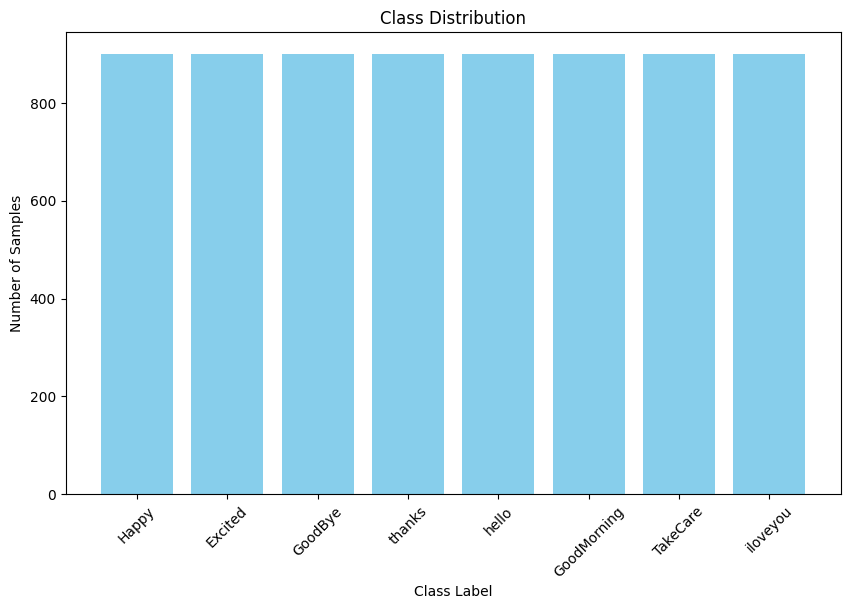

Class Distribution Counts:
Happy: 900 samples
Excited: 900 samples
GoodBye: 900 samples
thanks: 900 samples
hello: 900 samples
GoodMorning: 900 samples
TakeCare: 900 samples
iloveyou: 900 samples


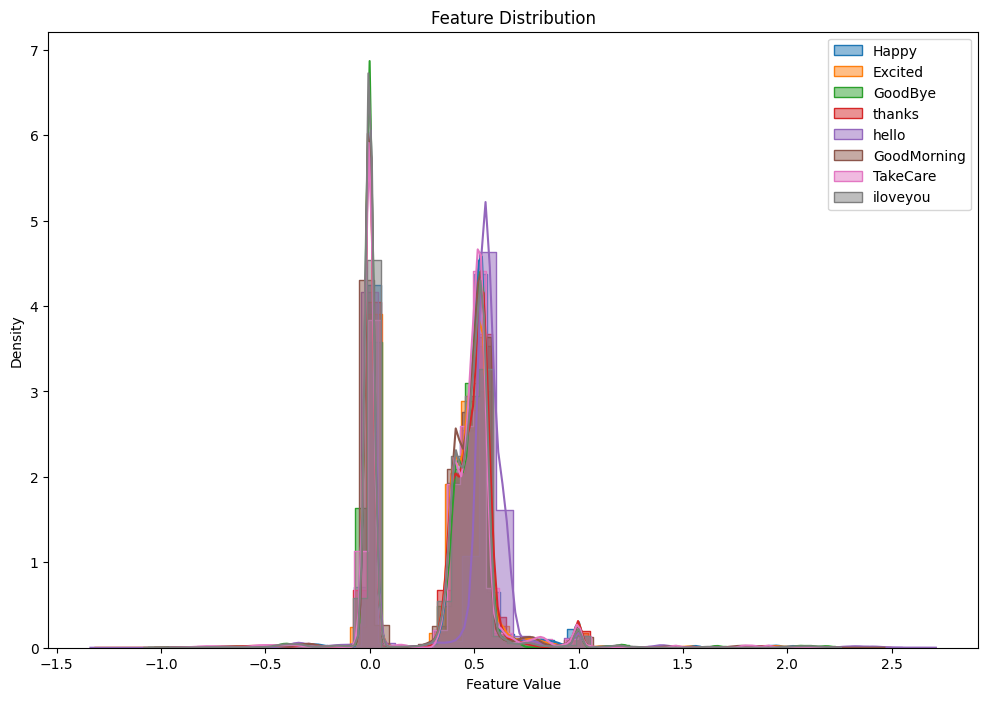

In [7]:
# Analysing data for biases that could influence model performance

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Function to analyse class distribution bias
def analyze_class_distribution(label_data):
    class_counts = {label: len(files) for label, files in label_data.items()}
    
    plt.figure(figsize=(10, 6))
    plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
    plt.title('Class Distribution')
    plt.xlabel('Class Label')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.show()
    
    print("Class Distribution Counts:")
    for label, count in class_counts.items():
        print(f"{label}: {count} samples")

# Function to analyse feature distribution bias (e.g., pixel intensities, keypoints)
def analyze_feature_distribution(label_data):
    all_features = {}
    
    for label, files in label_data.items():
        combined_features = []
        for file in files:
            data = np.load(file)
            combined_features.append(data.flatten())
        
        all_features[label] = np.concatenate(combined_features)
    
    # Plot feature distributions
    plt.figure(figsize=(12, 8))
    for label, features in all_features.items():
        sns.histplot(features, bins=50, kde=True, label=label, element="step", stat="density")
    
    plt.title('Feature Distribution')
    plt.xlabel('Feature Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Function to analyse potential biases
def analyze_bias(directory):
    label_data = {}
    
    # Organise files by label
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        
        label_data[label] = []
        for subfolder in os.listdir(label_dir):
            subfolder_path = os.path.join(label_dir, subfolder)
            if not os.path.isdir(subfolder_path):
                continue
            
            for file in os.listdir(subfolder_path):
                if file.endswith('.npy'):
                    file_path = os.path.join(subfolder_path, file)
                    label_data[label].append(file_path)
    
    # Analyse class distribution for bias
    analyze_class_distribution(label_data)
    
    # Analyse feature distribution for bias
    analyze_feature_distribution(label_data)


directory_path = r'/Users/manognatellore/Desktop/MT_Data' 

# Start the bias analysis
if os.path.exists(directory_path):
    analyze_bias(directory_path)
else:
    print(f"The directory {directory_path} does not exist.")


In [8]:
# Statistical Feature Extracted from Images

import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Function to extract statistical features from an image
def extract_features(image):
    features = {}
    features['mean'] = np.mean(image)
    features['std'] = np.std(image)
    features['min'] = np.min(image)
    features['max'] = np.max(image)
    features['skewness'] = skew(image.ravel())
    features['kurtosis'] = kurtosis(image.ravel())
    return features

# Function to process a directory of images and return a DataFrame with averaged features per label
def process_directory(directory):
    label_features = {}

    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue

        # Initialise accumulators for this label
        accumulated_features = None
        image_count = 0
        
        for subfolder in os.listdir(label_dir):
            subfolder_path = os.path.join(label_dir, subfolder)
            if not os.path.isdir(subfolder_path):
                continue
            
            for file in os.listdir(subfolder_path):
                if file.endswith('.npy'):
                    file_path = os.path.join(subfolder_path, file)
                    image = np.load(file_path)  # Load the image data
                    features = extract_features(image)

                    # Accumulate the features
                    if accumulated_features is None:
                        accumulated_features = {key: 0.0 for key in features}
                    
                    for key in features:
                        accumulated_features[key] += features[key]
                    
                    image_count += 1
        
        # Compute average features for the label
        if image_count > 0:
            for key in accumulated_features:
                accumulated_features[key] /= image_count
            accumulated_features['label'] = label
            label_features[label] = accumulated_features

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(label_features, orient='index')
    return df


directory_path = r'/Users/manognatellore/Desktop/MT_Data'  

# Process the directory and create a DataFrame
if os.path.exists(directory_path):
    df = process_directory(directory_path)
    print(df)  
else:
    print(f"The directory {directory_path} does not exist.")


                 mean       std       min       max  skewness  kurtosis  \
Happy        0.344712  0.289561 -0.752830  2.048768  0.331192  3.148641   
Excited      0.339885  0.287677 -0.746044  2.011280  0.287959  3.083346   
GoodBye      0.328691  0.291879 -0.738934  2.187227  0.622459  4.593410   
thanks       0.339648  0.284408 -0.698790  1.938565  0.183030  2.597030   
hello        0.376960  0.326159 -0.652466  2.442715  0.598548  4.254441   
GoodMorning  0.335567  0.282193 -0.701260  1.876566  0.179597  2.212836   
TakeCare     0.339814  0.288579 -0.825023  1.916337  0.077023  2.485648   
iloveyou     0.326243  0.289951 -0.723394  2.159785  0.620845  4.415953   

                   label  
Happy              Happy  
Excited          Excited  
GoodBye          GoodBye  
thanks            thanks  
hello              hello  
GoodMorning  GoodMorning  
TakeCare        TakeCare  
iloveyou        iloveyou  
